# Linear Regression 

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load point data for training and testing

In [2]:
fname_data  = 'assignment_07_data.csv'

data        = np.genfromtxt(fname_data, delimiter=',')
num_data    = data.shape[0]

xx          = np.zeros(num_data)
yy          = np.zeros(num_data)
zz          = np.zeros(num_data)

for i in range(num_data):

    xx[i] = data[i,0]
    yy[i] = data[i,1]
    zz[i] = data[i,2]

## plot the data in the three dimensional space

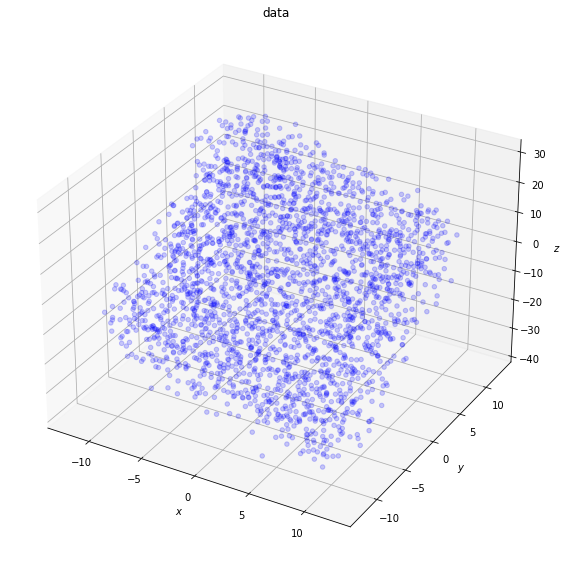

In [3]:
fig = plt.figure(figsize=(12, 8))

ax1 = plt.subplot(111, projection='3d')
plt.title('data')

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_zlabel('$z$')

ax1.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)

plt.tight_layout()
plt.show()

## compute the loss function

In [4]:
def compute_residual(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    
    ones = np.ones(shape=(len(x),))
    data_matrix = np.c_[ones.T, x.T, y.T] # (2500,3)
    
    func = np.dot(data_matrix, theta.T) # (2500,3)*(3,1)=(2500,1)
    
    residual = z - func
    
    return residual
    
    # ============================
    return residual, num_data

In [5]:
def compute_loss(theta, x, y, z):
    # ===== FILL UP THE CODE =====

    loss = (0.5 / len(x)) * np.sum(np.power(compute_residual(theta, x, y, z), 2))
    
    # ============================
    return loss

## compute the gradient for each model parameter (DO NOT COMPUTE THE GRADIENT FOR EACH MODEL PARAMETER, BUT DO COMPUTE THE GRADIENT OF THE MODEL PARAMTER VECTOR)

In [6]:
x = np.array([1,2,3])
y = np.array([4,5,6])
z = np.array([7,8,9])
k = np.c_[x.T, y.T,z.T]
k

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [7]:
def compute_gradient(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    
    ones = np.ones(shape=(len(x),))
    data_matrix = np.c_[ones.T, x.T,y.T]
    XT = data_matrix.T
    Xw = np.dot(data_matrix, theta)
    grad = 1/len(x) * np.dot(XT, Xw - z)

    # ============================
    return grad

## gradient descent for each model parameter

In [8]:
num_iteration   = 1000
learning_rate   = 0.01

theta           = np.array((0, 0, 0))
theta_iteration = np.zeros((num_iteration, theta.size))
loss_iteration  = np.zeros(num_iteration)

for i in range(num_iteration):
    # ===== FILL UP THE CODE =====
    
    theta = theta - learning_rate * compute_gradient(theta, xx, yy, zz)
    theta_iteration[i] = theta
    
    loss = compute_loss(theta, xx, yy, zz)
    loss_iteration[i] = loss

    # ============================
    print("iteration = %4d, loss = %5.5f" % (i, loss))

iteration =    0, loss = 46.08423
iteration =    1, loss = 25.70661
iteration =    2, loss = 17.25197
iteration =    3, loss = 13.71586
iteration =    4, loss = 12.20934
iteration =    5, loss = 11.54086
iteration =    6, loss = 11.21896
iteration =    7, loss = 11.04093
iteration =    8, loss = 10.92313
iteration =    9, loss = 10.83106
iteration =   10, loss = 10.75047
iteration =   11, loss = 10.67546
iteration =   12, loss = 10.60359
iteration =   13, loss = 10.53382
iteration =   14, loss = 10.46572
iteration =   15, loss = 10.39908
iteration =   16, loss = 10.33383
iteration =   17, loss = 10.26989
iteration =   18, loss = 10.20723
iteration =   19, loss = 10.14582
iteration =   20, loss = 10.08563
iteration =   21, loss = 10.02664
iteration =   22, loss = 9.96883
iteration =   23, loss = 9.91217
iteration =   24, loss = 9.85663
iteration =   25, loss = 9.80220
iteration =   26, loss = 9.74885
iteration =   27, loss = 9.69657
iteration =   28, loss = 9.64532
iteration =   29, los

iteration =  728, loss = 7.12145
iteration =  729, loss = 7.12145
iteration =  730, loss = 7.12145
iteration =  731, loss = 7.12145
iteration =  732, loss = 7.12145
iteration =  733, loss = 7.12145
iteration =  734, loss = 7.12145
iteration =  735, loss = 7.12145
iteration =  736, loss = 7.12145
iteration =  737, loss = 7.12145
iteration =  738, loss = 7.12145
iteration =  739, loss = 7.12145
iteration =  740, loss = 7.12145
iteration =  741, loss = 7.12145
iteration =  742, loss = 7.12145
iteration =  743, loss = 7.12145
iteration =  744, loss = 7.12145
iteration =  745, loss = 7.12145
iteration =  746, loss = 7.12145
iteration =  747, loss = 7.12144
iteration =  748, loss = 7.12144
iteration =  749, loss = 7.12144
iteration =  750, loss = 7.12144
iteration =  751, loss = 7.12144
iteration =  752, loss = 7.12144
iteration =  753, loss = 7.12144
iteration =  754, loss = 7.12144
iteration =  755, loss = 7.12144
iteration =  756, loss = 7.12144
iteration =  757, loss = 7.12144
iteration 

In [9]:
f = theta[0] + theta[1] * xx + theta[2] * yy

## plot the results

In [10]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.title('loss')
    # ===== FILL UP THE CODE =====
    x = np.arange(0, num_iteration)
    y = loss_iteration
    
    plt.plot(x, y, color='red')

    # ============================
    plt.tight_layout()
    plt.show()

In [11]:
def plot_data(xx, yy, zz):
    
    fig = plt.figure(figsize=(12, 8))
    ax  = plt.subplot(111, projection='3d')
    plt.title('data')
    # ===== FILL UP THE CODE =====
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)
    
    # ============================    
    plt.tight_layout()
    plt.show()

In [12]:
def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    # ===== FILL UP THE CODE =====
    x = np.arange(0, num_iteration)
    
    theta0 = [theta for theta in theta_iteration.T[0]]
    theta1 = [theta for theta in theta_iteration.T[1]]
    theta2 = [theta for theta in theta_iteration.T[2]]
    
    plt.plot(x, theta0, color = 'red')
    plt.plot(x, theta1, color = 'green')
    plt.plot(x, theta2, color = 'blue')

    # ============================
    plt.tight_layout()
    plt.show()

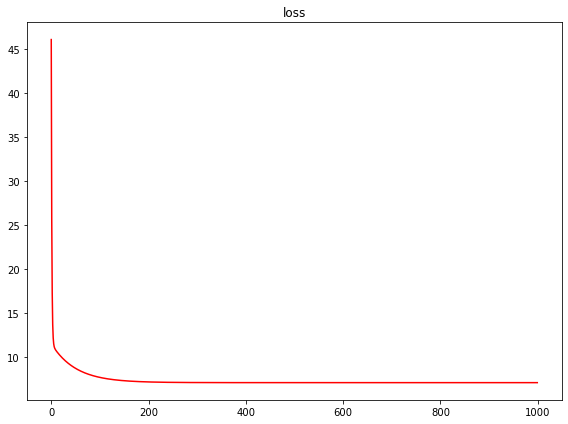

In [13]:
plot_loss_curve(loss_iteration)

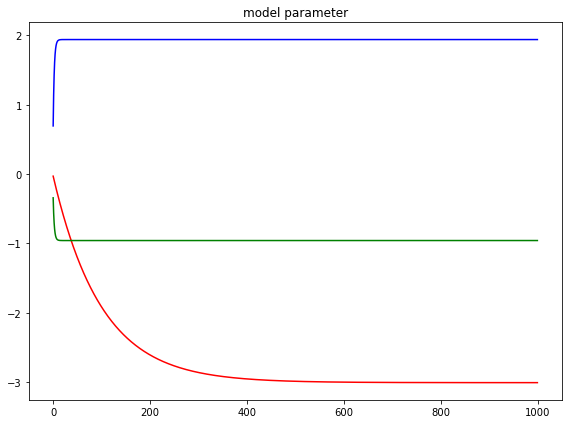

In [14]:
plot_model_parameter(theta_iteration)

In [15]:
# ===== FILL UP THE CODE =====

XX, YY = np.meshgrid(xx, yy)

ZZ = theta[0] + theta[1] * XX + theta[2] * YY

# ============================

def plot_surface(XX, YY, ZZ, xx, yy, zz):
    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111, projection='3d')
    plt.title('regression surface')

    ax  = plt.axes(projection='3d')
    # ===== FILL UP THE CODE =====
    
    ax.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)
    ax.plot_surface(XX, YY, ZZ, cmap='rainbow')

    # ============================
    plt.tight_layout()
    plt.show()

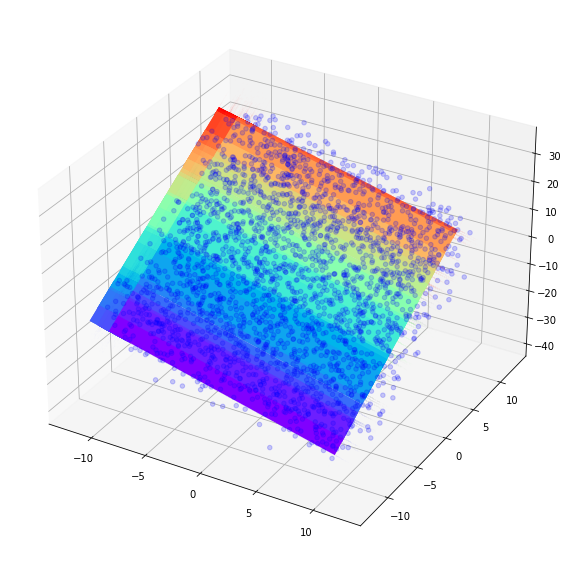

In [16]:
plot_surface(XX, YY, ZZ, xx, yy, zz)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue point in 3-dimensional space

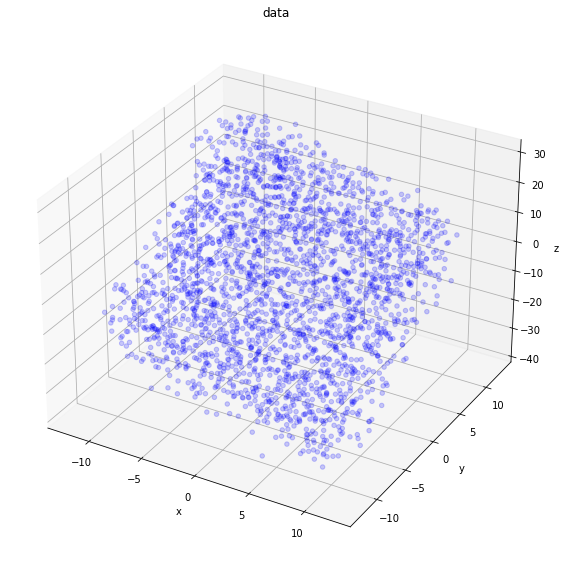

In [17]:
plot_data(xx, yy, zz)

### # 02. plot the values of the model parameters $\theta_0$ in red curve, $\theta_1$ in green curve, and $\theta_2$ in blue curve over the gradient descent iterations

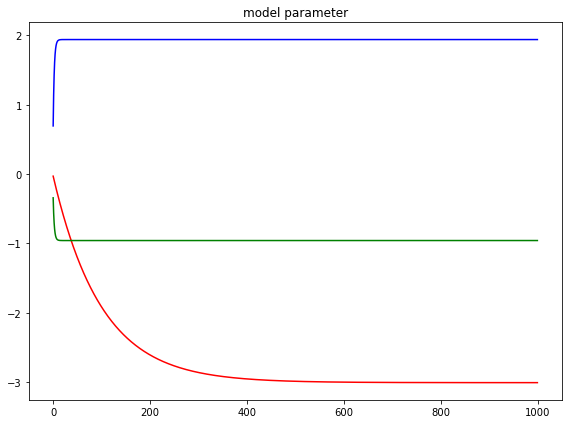

In [18]:
plot_model_parameter(theta_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

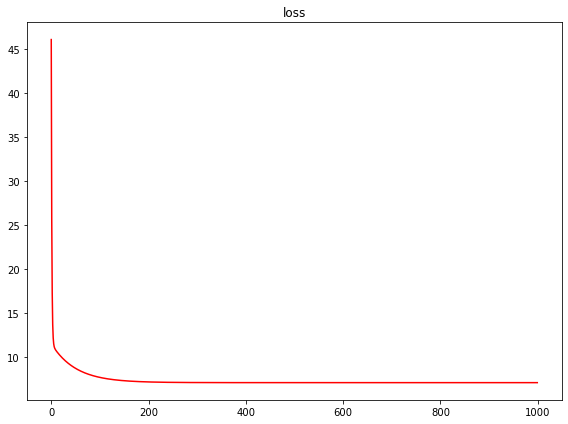

In [19]:
plot_loss_curve(loss_iteration)

### # 04. plot the optimal regression surface $\hat{f}(\theta^*)$ in 3-dimensional space with a given set of data points superimposed

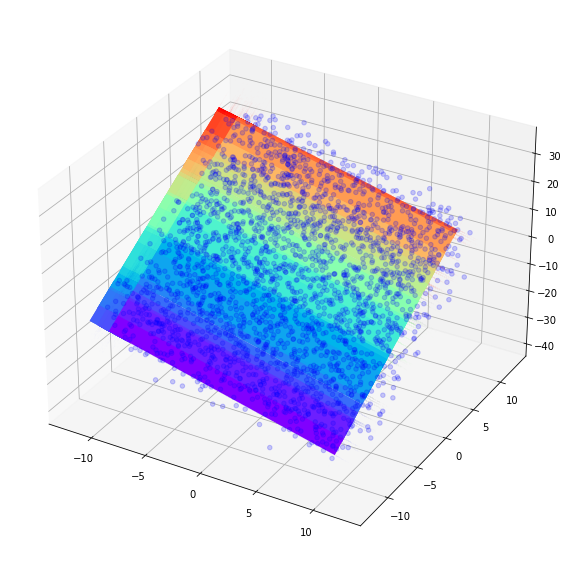

In [20]:
plot_surface(XX, YY, ZZ, xx, yy, zz)